In [10]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob

os.sys.path.append('../')
import utilities as u
import preprocessing as pp


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# load session
mouse = '4139190.1'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
213,4139190.1,15_06_2018,1,TwoTower_noTimeout,56,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...
212,4139190.1,15_06_2018,3,TwoTower_noTimeout,48,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.1\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2...
151,4139190.1,16_06_2018,2,TwoTower_noTimeout,59,1,2018-06-16,G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...
210,4139190.1,19_06_2018,2,TwoTower_Timeout,75,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...
175,4139190.1,21_06_2018,3,TwoTower_Timeout,92,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
169,4139190.1,24_06_2018,2,TwoTower_Timeout,104,1,2018-06-24,G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
173,4139190.1,25_06_2018,2,TwoTower_Timeout,62,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
205,4139190.1,27_06_2018,2,TwoTower_Timeout,81,1,2018-06-27,G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...
4,4139190.1,11_07_2018,17,TwoTower_Timeout,58,1,2018-07-11,G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...
225,4139190.1,11_07_2018,17,TwoTower_Timeout,58,1,2018-07-11,G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...


In [92]:
# load behavior
sess = df_mouse.iloc[0]
VRDat, C = pp.load_scan_sess(sess)
C_z = sp.stats.zscore(C,axis=0)
    

G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if ca_cumsum[-1,-1]<ca_cumsum[-1,-2]:
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.1\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat
#subsystem#not made into numpy array


In [93]:
# by trial info and position binned neural data
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
C_morph_dict = u.trial_type_dict(C_trial_mat,trial_info['morphs'])
occ_morph_dict = u.trial_type_dict(occ_trial_mat,trial_info['morphs'])

dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


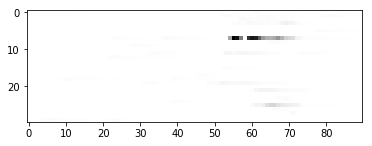

In [94]:
f,ax = plt.subplots()
ax.imshow(C_morph_dict[1][:,:,0],cmap='Greys')
print(trial_info.keys())

In [106]:
# find place cells in 2 extremes from split halves (even-odd) procedure
### something is off here
masks={}
for k in [0,1]:
    print(C_morph_dict[k].shape)
    fr_even, occ_even = np.nanmean(C_morph_dict[k][0::2,:,:],axis=0), occ_morph_dict[k][0::2,:].sum(axis=0)
    occ_even = occ_even/occ_even.sum()
    fr_odd, occ_odd = np.nanmean(C_morph_dict[k][1::2,:,:],axis = 0), occ_morph_dict[k][1::2,:].sum(axis=0)
    occ_odd = occ_odd/occ_odd.sum()

    si_e = spatial_info(fr_even,occ_even)
    si_o = spatial_info(fr_odd,occ_odd)
    

    
    mask = VRDat['morph']._values==k
    
    fr_all, occ_all = u.rate_map(C[mask,:],VRDat.loc[mask,'pos']._values,bin_size=5)
    si_all = u.spatial_info(fr_all,occ_all)
    for z in zip(si_e.tolist(),si_o.tolist(),si_all.tolist()):
        print(z)
    p_e, shuffled_SI = spatial_info_perm_test(si_e,C,VRDat['pos'],nperms = 100)
    p_o, shuffled_SI = spatial_info_perm_test(si_o,C,VRDat['pos'],nperms = 100,shuffled_SI = shuffled_SI)
    
    
    
    p = np.multiply(p_e>.95,p_o>.95)
    masks[k] = p



(30, 90, 1319)
(0.004336627544491329, 0.005578599446944625, -975.3038472016589)
(0.007530799278848141, 0.008196339573562158, -845.5740694519033)
(0.005278093827017679, 0.0044879880532499306, -1400.6251183883612)
(0.0012485011184168138, 0.0066034194451693555, -1297.929391384613)
(0.0029074201044581487, 0.007589416741206573, -1278.214781094887)
(0.0019074774284906365, 0.00393703250341035, -988.823109189222)
(0.001745913966387753, 0.0032067936618159158, -1126.8626511356401)
(0.0006746681583825912, 0.004118309383443219, -1114.9393389524394)
(0.006326411695255048, 0.004419896045096697, -1213.7846144018363)
(0.0018063165285138775, 0.0013388890582038025, -1224.249860915931)
(0.002687045576855493, 0.0038433913552389436, -1001.7876915838872)
(0.0013121550443618195, 0.0021742875201869634, -1232.915832467868)
(0.002845824491900465, 0.0029599176482464047, -1010.1622526013272)
(0.007204138369740225, 0.0015579406420926532, -1124.6050878307162)
(0.0031581419621952087, 0.003262452549798923, -1010.7949

In [102]:
print(np.where(masks[k]==False))

(array([], dtype=int64),)


In [7]:
# plot place cell results using these cells
    # highlight reward zones

In [8]:
# statistics of place cells

# number in each environment

# number with place fields in both
    # including, excluding reward zones
    
# reward zone cells

# place field shift distribution



In [9]:
# non rewarded lick-triggered average